## CS4243 Lab 1: Template Matching

**ASSIGNMENT SUBMISSION DEADLINE: Feb. 13, 22:00**

**Instructions:**
- See `lab1.pdf` and `lab1.py` for detailed descriptions.

- The functions to be implemented are given in `lab1.py`, with a description of each function. You will need to fill in the code where it is marked with the following:
    ```
    """ Your code starts here """

    """ Your code ends here """
    ```
- For open questions, write your answers directly into the notebook. 

- The test images are given in folder `data/input`.

- You are free to use NumPy functions, but you may not use `numpy.pad()`, `numpy.convolve()` or other built-in functions of OpenCV aside from those already in the code template.


**Attention:**
- Please be careful about the data type of the image!
- Please use python with version >= 3.8.4, and install the libs provided in requirements.txt via `pip install -r requirements.txt`.
- Please do not change the structure of files in the whole folder of this assignment, otherwise TA may mark your code wrongly.
- Please do not change the input arguments of the functions in `lab1.py`, otherwise your implementation would fail to pass the test.
- Except for the input parameters of `non_maximum_suppression()`, please do not change other codes in this notebook.

## Part 1: Image preprossessing (15%)

**Goal**: Implement following functions and then run the code cells below.
- `rgb2gray()`: **(5%)**
- `gray2grad()`: **(5%)**
- `pad_zeros()`: **(5%)**

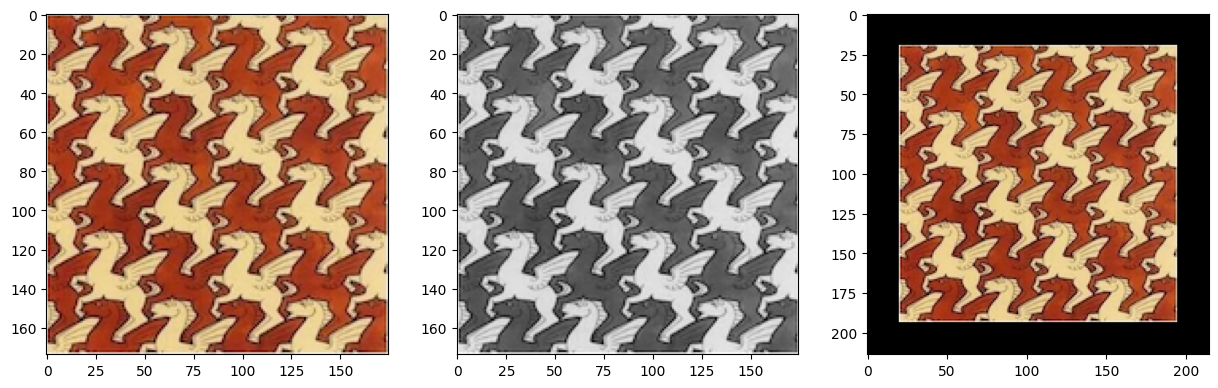

In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import lab1

importlib.reload(lab1)

data_dir = 'inputs'
filename = 'tiles.png'
img = lab1.read_img(os.path.join(data_dir, filename))

# RGB image to grayscale image
img_gray = lab1.rgb2gray(img)
# Grayscale image to gradient image
#img_grad_h, img_grad_v, img_grad_d1, img_grad_d2 = lab1.gray2grad(img_gray)
# Padding
img_pad = lab1.pad_zeros(img, 20, 20, 20, 20)

lab1.show_imgs([img, img_gray, img_pad])

#img_grad_h, img_grad_v, img_grad_d1, img_grad_d2, 
# For evaluation purpose
sobelh = np.array([[-1, 0, 1], 
                   [-2, 0, 2], 
                   [-1, 0, 1]], dtype = float)
img_grad_h_cv2 = cv2.filter2D(img_gray.astype(float), -1, cv2.flip(sobelh, -1), borderType=cv2.BORDER_CONSTANT)
#print('Relative error of gray2grad() (<1e-8 will be fine):', np.linalg.norm(img_grad_h - img_grad_h_cv2))

## Part 2: Normalized Cross-Correlation (30%)

**Goal**: Implement following functions and then run the code cells below.
- `normalized_cross_correlation()`: **(10%)**
- `normalized_cross_correlation_fast()`: **(10%)**
- `normalized_cross_correlation_matrix()`: **(10%)**

Runtime of normalized_cross_correlation(): 7.463710s
Runtime of normalized_cross_correlation_fast(): 0.534072s
Runtime of normalized_cross_correlation_matrix(): 0.361590s
Relative error of normalized_cross_correlation() (<1e-4 will be fine): 75.63416869256704
Relative error of normalized_cross_correlation_fast() (<1e-4 will be fine): 75.63416869256704
Relative error of normalized_cross_correlation_matrix() (<1e-4 will be fine): 75.07918738710913


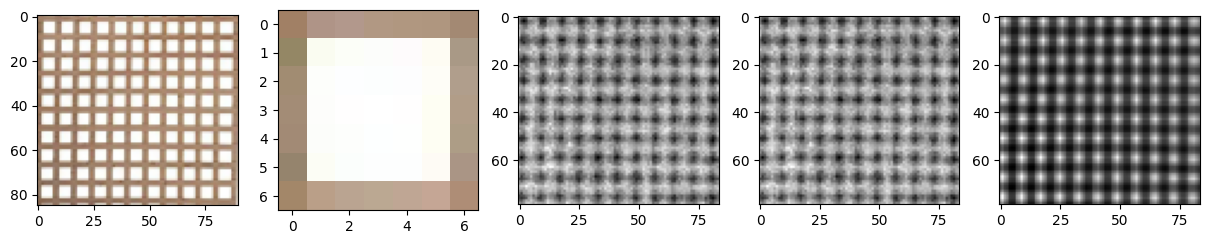

: 

In [ ]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'lattice.png'
img = lab1.read_img(os.path.join(data_dir, filename))
img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5) # downsample the input image to save computation cost
template = img[2:9, 2:9]

t1 = time.time()
response = lab1.normalized_cross_correlation(img, template)
t2 = time.time()
response_fast = lab1.normalized_cross_correlation_fast(img, template)
t3 = time.time()
response_matrix = lab1.normalized_cross_correlation_matrix(img, template)
t4 = time.time()

print('Runtime of normalized_cross_correlation(): %fs'%(t2-t1))
print('Runtime of normalized_cross_correlation_fast(): %fs'%(t3-t2))
print('Runtime of normalized_cross_correlation_matrix(): %fs'%(t4-t3))


lab1.show_imgs([img, template, response, response_fast, response_matrix])

# For evaluation purpose
response_cv2 = cv2.matchTemplate(img, template, cv2.TM_CCORR_NORMED)
print('Relative error of normalized_cross_correlation() (<1e-4 will be fine):', np.linalg.norm(response - response_cv2))
print('Relative error of normalized_cross_correlation_fast() (<1e-4 will be fine):', np.linalg.norm(response_fast - response_cv2))
print('Relative error of normalized_cross_correlation_matrix() (<1e-4 will be fine):', np.linalg.norm(response_matrix - response_cv2))

## Part 3: Non-maximum Suppression (10%)

**Goal**: Implement following functions and then run the code cells below.
- `non_max_suppression()`

In [ ]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import lab1
import cv2
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'lattice.png'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[19:35, 18:36]

# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)

# perform template matching
response_cv2 = cv2.matchTemplate(img, template, cv2.TM_CCORR_NORMED)
response = response_cv2 #lab1.normalized_cross_correlation_fast(img_pad, template)

lab1.show_imgs([img, template, response])

res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.95)
lab1.show_img_with_points(res, img_ori=img)

NameError: name 'cv2' is not defined

## Part 4: Study on Template Matching (45%)

### 4.1 Image Inputs (5%)
No question in this part. You will get full marks if you achieve similar results.

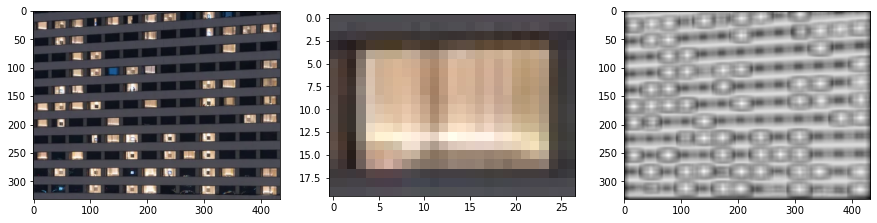

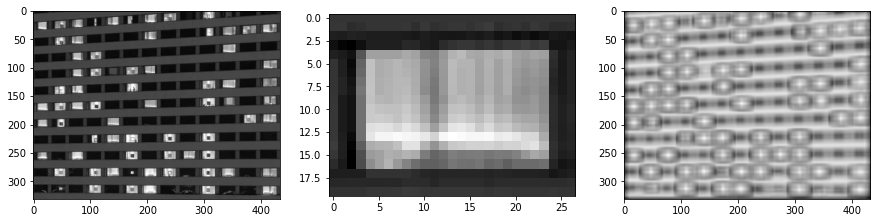

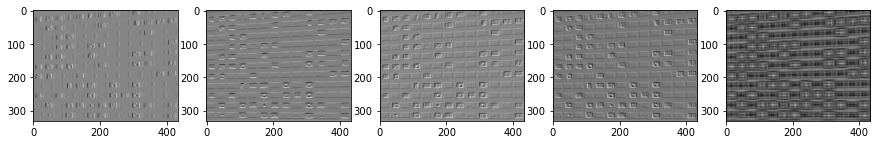

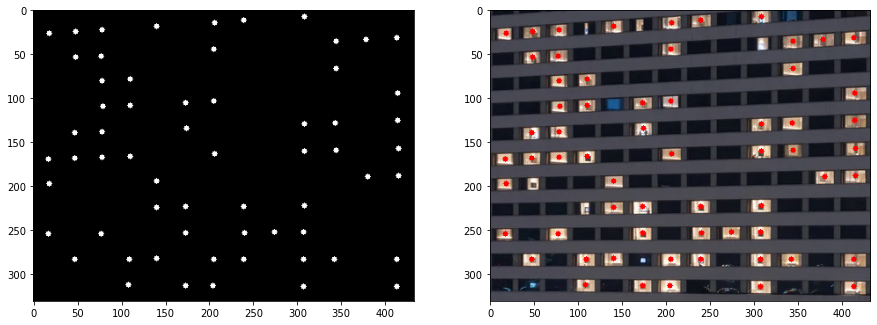

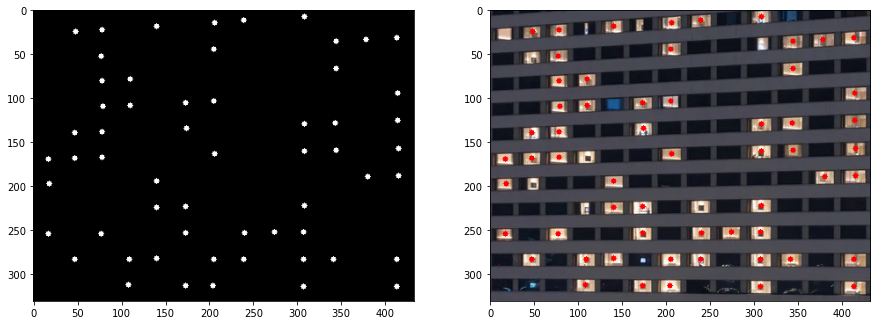

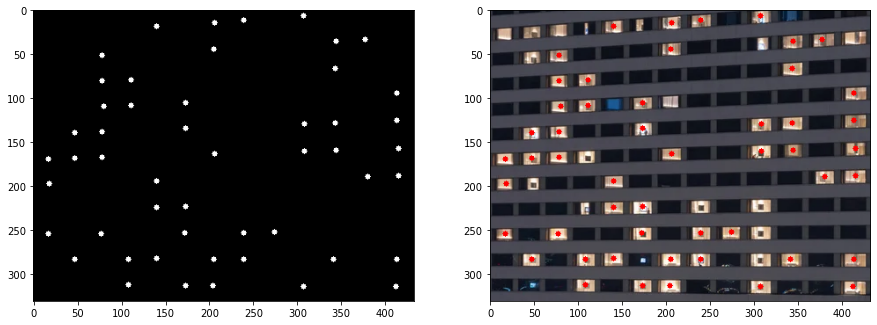

In [39]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import importlib
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'window.png'
img = lab1.read_img(os.path.join(data_dir, filename))
top, bottom, left, right = 215, 235, 127, 154
template = img[top:bottom, left:right]

# RGB to grayscale
img_gray = lab1.rgb2gray(img)
template_gray = lab1.rgb2gray(template)

# RGB to grayscale
img_gray = lab1.rgb2gray(img)
template_gray = img_gray[top:bottom, left:right]

# RGB to gradient map
img_grad_h, img_grad_v, img_grad_d1, img_grad_d2 = lab1.gray2grad(img_gray)
img_grad = np.stack([img_grad_h, img_grad_v, img_grad_d1, img_grad_d2], -1)
template_grad = img_grad[top:bottom, left:right]

# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
img_gray_pad = lab1.pad_zeros(img_gray, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
img_grad_pad = lab1.pad_zeros(img_grad, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)


# perform match template
response = lab1.normalized_cross_correlation_fast(img_pad, template)
response_gray = lab1.normalized_cross_correlation_fast(img_gray_pad, template_gray)
response_grad = lab1.normalized_cross_correlation_fast(img_grad_pad, template_grad)



lab1.show_imgs([img, template, response])
lab1.show_imgs([img_gray, template_gray, response_gray])
lab1.show_imgs([img_grad[:,:,0], img_grad[:,:,1], img_grad[:,:,2], img_grad[:,:,3], response_grad])

# !!! Adjust the suppression range and detection threshold to maximize recall of bright windows, while minimizing false positives from dark windows.
res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.8)
lab1.show_img_with_points(res, img_ori=img)

res_gray = lab1.non_max_suppression(response_gray, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.8)
lab1.show_img_with_points(res_gray, img_ori=img)

res_grad = lab1.non_max_suppression(response_grad, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.8)
lab1.show_img_with_points(res_grad, img_ori=img)

### 4.2 Template Inputs (6%)

**QUESTION**: Explain why their response positions are different. **(6%)**

**ANSWER**: (insert you answer here) 

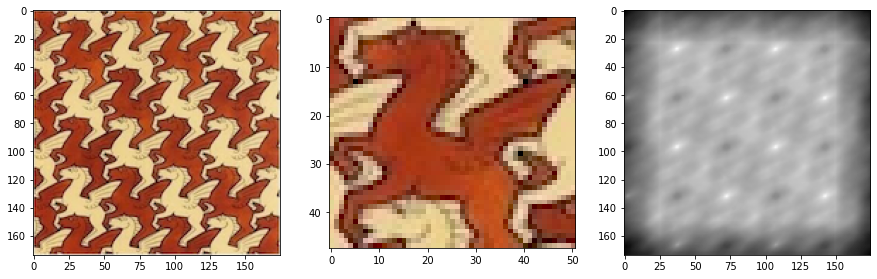

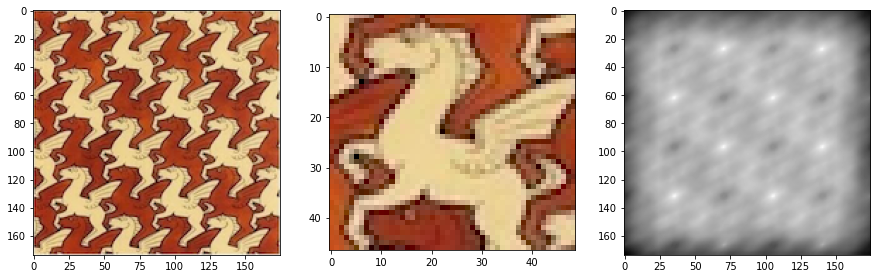

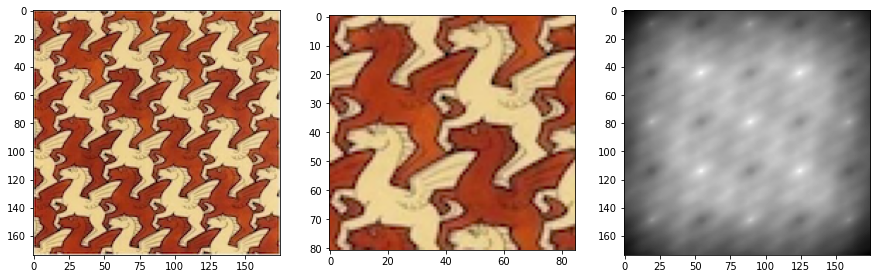

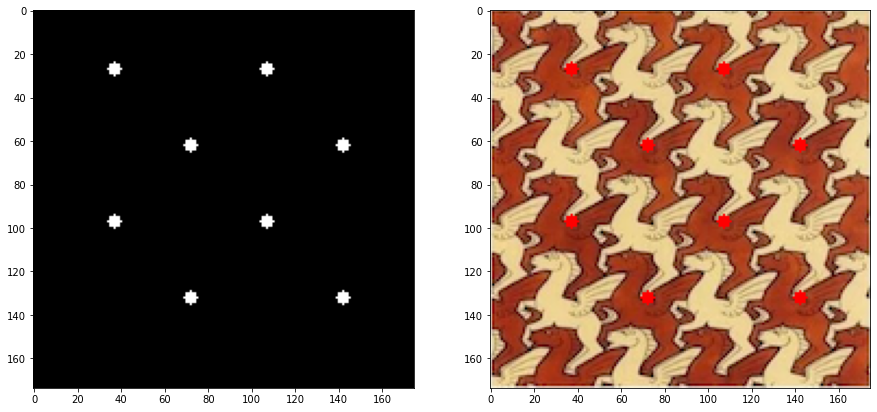

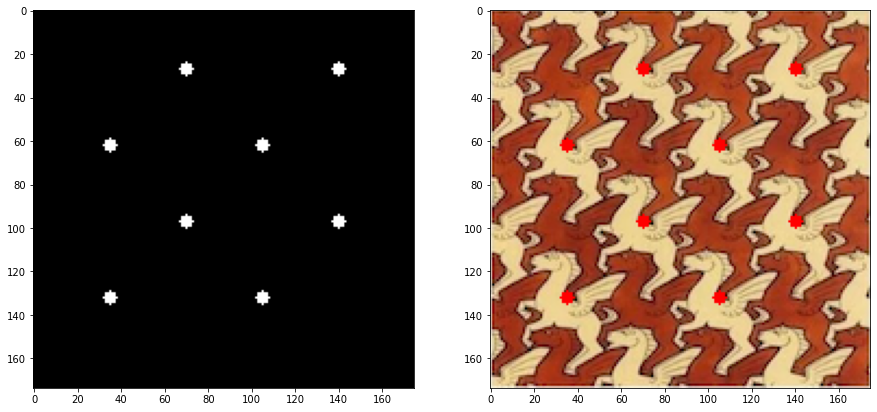

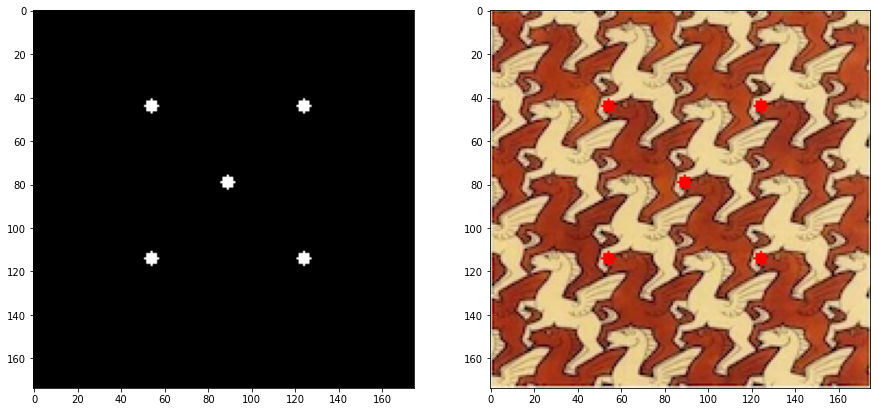

In [85]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import lab1
importlib.reload(lab1)


data_dir = 'inputs'
filename = 'tiles.png'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[4:52, 12:63]
template2 = img[4:51, 46:95]
template3 = img[4:85, 12:97]

# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
# perform match template
response = lab1.normalized_cross_correlation_fast(img_pad, template)


# pad zeros to the image
pad_height_bef, pad_height_aft = template2.shape[0] // 2 - (1 if template2.shape[0] % 2 == 0 else 0), template2.shape[0] // 2
pad_width_bef, pad_width_aft = template2.shape[1] // 2 - (1 if template2.shape[1] % 2 == 0 else 0), template2.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
# perform match template
response2 = lab1.normalized_cross_correlation_fast(img_pad, template2)


# pad zeros to the image
pad_height_bef, pad_height_aft = template3.shape[0] // 2 - (1 if template3.shape[0] % 2 == 0 else 0), template3.shape[0] // 2
pad_width_bef, pad_width_aft = template3.shape[1] // 2 - (1 if template3.shape[1] % 2 == 0 else 0), template3.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
# perform match template
response3 = lab1.normalized_cross_correlation_fast(img_pad, template3)

lab1.show_imgs([img, template, response])
lab1.show_imgs([img, template2, response2])
lab1.show_imgs([img, template3, response3])

res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.5), int(template.shape[1] * 0.5)), threshold=0.9)
lab1.show_img_with_points(res, img_ori=img)

res2 = lab1.non_max_suppression(response2, (int(template2.shape[0] * 0.5), int(template2.shape[1] * 0.5)), threshold=0.9)
lab1.show_img_with_points(res2, img_ori=img)

res3 = lab1.non_max_suppression(response3, (int(template3.shape[0] * 0.4), int(template3.shape[1] * 0.4)), threshold=0.9)
lab1.show_img_with_points(res3, img_ori=img)

### 4.3 Template Size (6%）

**QUESTION**: How can each of these templates detect every hole present in the input image? **(2%)**

**ANSWER**:  


**QUESTION**: Analyze and explain the subtle differences in the output borders. **(2%)**

**ANSWER**: 


**QUESTION**: Describe the correlation output with templates with a 1x1.5 or a 1x2 array of holes. **(2%)**

**ANSWER**: 

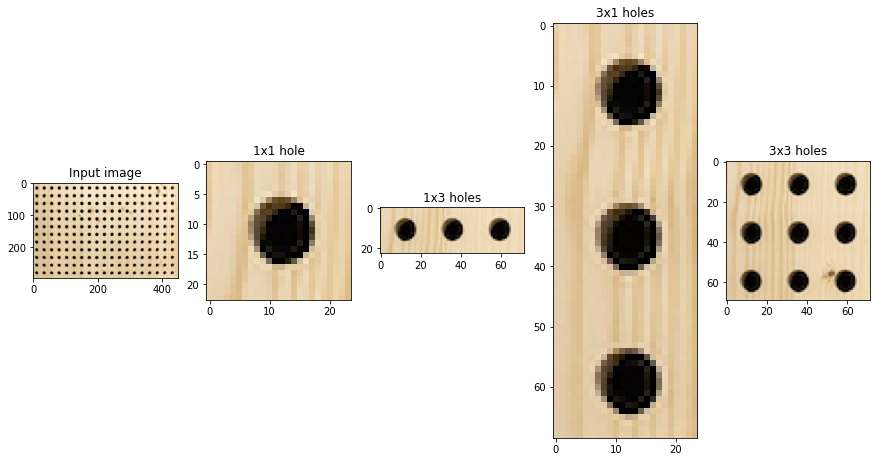

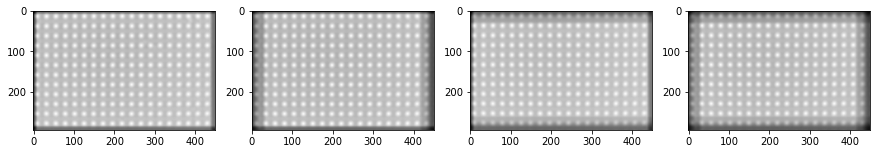

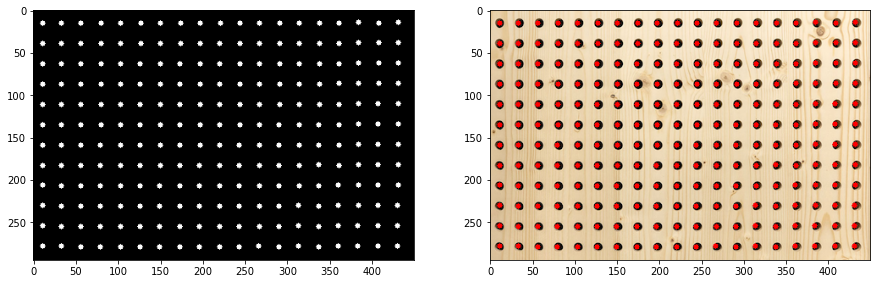

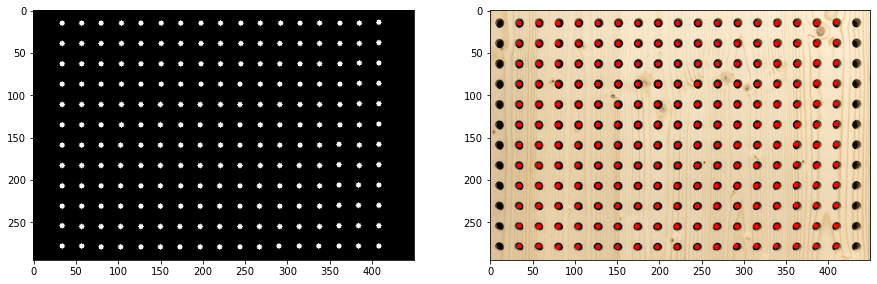

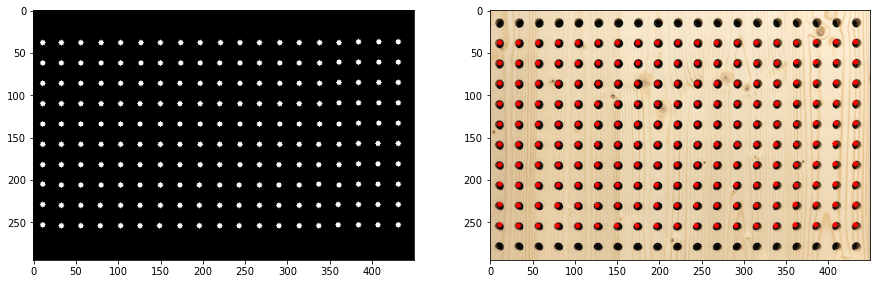

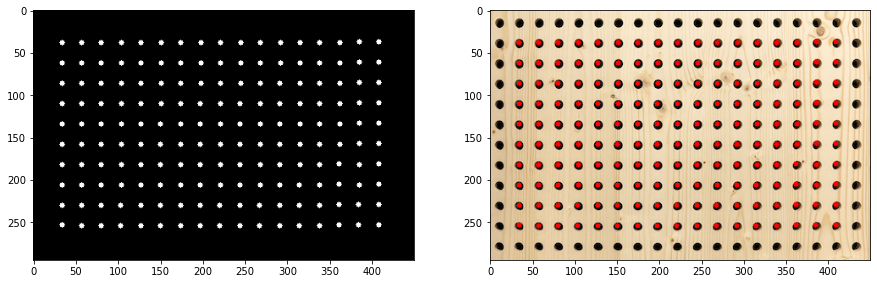

In [86]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import random
import lab1
importlib.reload(lab1)
random.seed(0)


data_dir = 'inputs'
filename = 'holes.png'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[28:51, 22:46]
template2 = img[28:51, 22:94]
template3 = img[28:97, 22:46]
template4 = img[28:97, 22:94]

# Template 1x1
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response = lab1.normalized_cross_correlation_fast(img_pad, template)

# Template 1x3
pad_height_bef, pad_height_aft = template2.shape[0] // 2 - (1 if template2.shape[0] % 2 == 0 else 0), template2.shape[0] // 2
pad_width_bef, pad_width_aft = template2.shape[1] // 2 - (1 if template2.shape[1] % 2 == 0 else 0), template2.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response2 = lab1.normalized_cross_correlation_fast(img_pad, template2)

# Template 3x1
pad_height_bef, pad_height_aft = template3.shape[0] // 2 - (1 if template3.shape[0] % 2 == 0 else 0), template3.shape[0] // 2
pad_width_bef, pad_width_aft = template3.shape[1] // 2 - (1 if template3.shape[1] % 2 == 0 else 0), template3.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response3 = lab1.normalized_cross_correlation_fast(img_pad, template3)

# Template 3x3
pad_height_bef, pad_height_aft = template4.shape[0] // 2 - (1 if template4.shape[0] % 2 == 0 else 0), template4.shape[0] // 2
pad_width_bef, pad_width_aft = template4.shape[1] // 2 - (1 if template4.shape[1] % 2 == 0 else 0), template4.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response4 = lab1.normalized_cross_correlation_fast(img_pad, template4)

lab1.show_imgs([img, template, template2, template3, template4], titles=['Input image', '1x1 hole', '1x3 holes', '3x1 holes', '3x3 holes'])
lab1.show_imgs([response, response2, response3, response4])

res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res, img_ori=img)

res2 = lab1.non_max_suppression(response2, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res2, img_ori=img)

res3 = lab1.non_max_suppression(response3, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res3, img_ori=img)

res4 = lab1.non_max_suppression(response4, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res4, img_ori=img)

### 4.4 Mean-subtracted cross correlation (16%)

**Goal**: Implement following functions and then run the code cells below.
- `normalized_cross_correlation_ms()`: **(10%)**

**QUESTION**: What are the benefits of subtracting the mean? **(6%)**

**ANSWER**:  

Relative error of normalized_cross_correlation() (<1e-4 will be fine): 2.422159753881622e-05
Relative error of normalized_cross_correlation_ms() (<1e-3 will be fine): 0.0001834007172988584


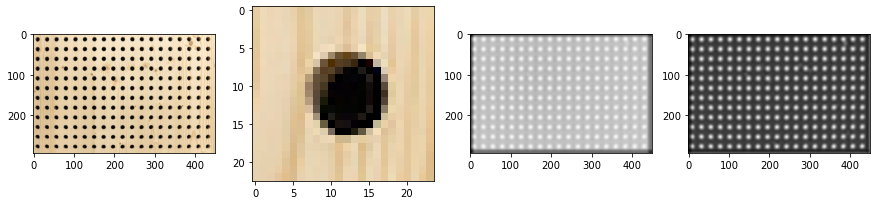

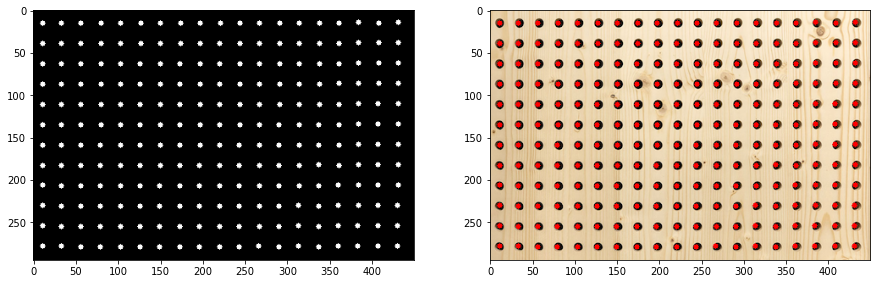

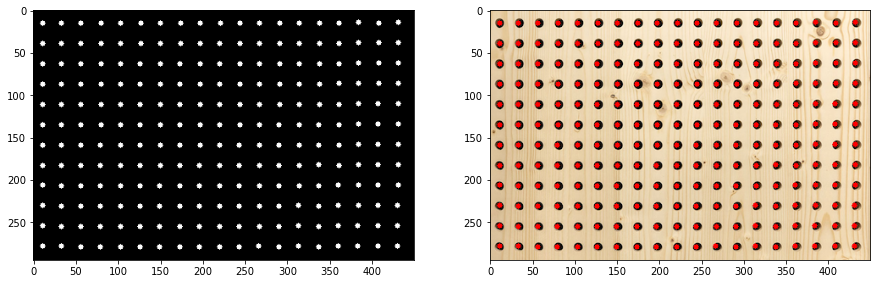

In [87]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'holes.png'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[28:51, 22:46]


# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)

response = lab1.normalized_cross_correlation_fast(img_pad, template)
response_ms = lab1.normalized_cross_correlation_ms(img_pad, template)

lab1.show_imgs([img, template, response, response_ms])

response_cv2 = cv2.matchTemplate(img_pad, template, cv2.TM_CCORR_NORMED)
response_cv2_ms = cv2.matchTemplate(img_pad, template, cv2.TM_CCOEFF_NORMED)
print('Relative error of normalized_cross_correlation() (<1e-4 will be fine):', np.linalg.norm(response - response_cv2))
print('Relative error of normalized_cross_correlation_ms() (<1e-3 will be fine):', np.linalg.norm(response_ms - response_cv2_ms))

res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res, img_ori=img)
res_ms = lab1.non_max_suppression(response_ms, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.5)
lab1.show_img_with_points(res_ms, img_ori=img)

### 4.5 Auto-Correlation (6%)

**QUESTION**: Explain why the correlation output responses decrease as one gets further away from the center of the output. **(6%)**

**ANSWER**:  

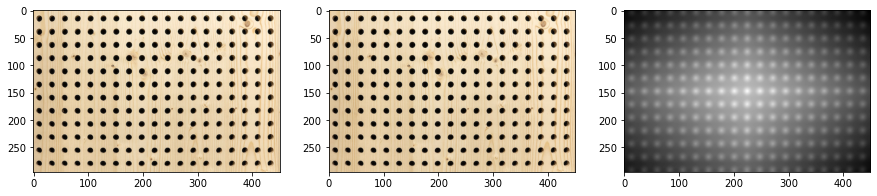

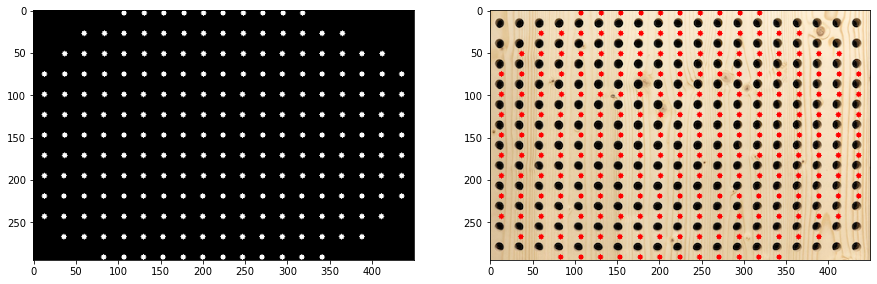

In [88]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'holes.png'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img.copy()

# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)

response = cv2.matchTemplate(img_pad, template, cv2.TM_CCORR_NORMED)
lab1.show_imgs([img, template, response])

res = lab1.non_max_suppression(response, (13, 13), threshold=0.6)
lab1.show_img_with_points(res, img_ori=img)

### 4.6 Limitations (6%)

**QUESTION**: Observe the outputs and explain why template matching fails in certain regions of the image. **(6%)**

**ANSWER**: 

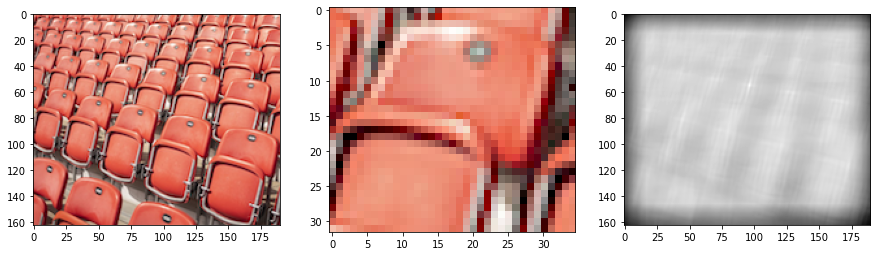

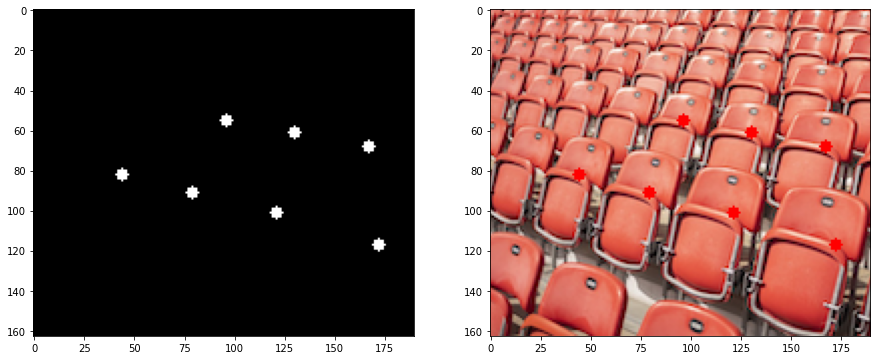

In [89]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'chairs.png'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[40:72, 79:114]
# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)

response = lab1.normalized_cross_correlation_fast(img_pad, template)

lab1.show_imgs([img, template, response])


res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.5), int(template.shape[1] * 0.5)), threshold=0.94)
lab1.show_img_with_points(res, img_ori=img)


**Congrats! You have completed all tasks for lab 1.**